# Pointplot, Stripplot e Swarmplot: Mais distribuições e comparando pontos específicos

Na aula referente ao Capítulo 4 vimos que em certas situações podemos não estar interessados em visualizar toda a evolução de uma medida. Naquele momento, não detínhamos as ferramentas necessárias para fazer esse gráfico, contudo com a introdução do `query` no Capítulo 5 estamos preparados para ver esse gráfico. 

Além disso, vamos continuar trabalhando com distribuições de dados: vamos ver como o pointplot é flexível e pode também ser usado para comparar distribuições de variáveis categóricas distintas, e também a introduzir o Swarmplot que tem a mesma função, mas exibindo cada uma de nossas observações.

Vamos importar nossos dados com a informação histórica do IDH.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

idh = pd.read_csv("https://bit.ly/idh_tidy")

In [2]:
idh.head(3)

,sigla,pais,grupo_idh,regiao,ranking_idh,ano,idh,idh_ev,idh_ee,idh_me,...,gdi_ev_m,gdi_ee_m,gdi_me_m,gdi_rpc_m,extra_ap_f,extra_ap_m,extra_ft_f,extra_ft_m,extra_co2,extra_pop
0,AFG,Afeganistão,Baixo,Ásia do Sul,182.0,1990,0.284,45.967,2.93646,0.871962,...,43.709,4.532768,1.493952,NaN,NaN,NaN,NaN,NaN,0.189279,10.694796
1,ALB,Albânia,Alto,Europa e Ásia Central,74.0,1990,0.649,73.144,11.57934,7.354632,...,70.050,11.988330,7.920670,5972.920553,NaN,NaN,45.22,50.78,1.675414,3.295066
2,DZA,Argélia,Alto,Países Árabes,93.0,1990,0.593,67.416,9.79789,4.614608,...,66.313,NaN,6.020075,NaN,3.157895,96.842105,NaN,NaN,3.007186,25.518074


# Como comparar pontos específicos: variação total com o pointplot

Já temos todo o arcabouço necessário para criar um gráfico que compare duas observações em um mesmo gráfico: por exemplo, o primeiro e último ano de uma dimensão do IDH de países diferentes, basta sabermos as categorias que queremos manter para fazer o `query`, como aprendemos no capítulo anterior. Além disso, basta mudarmos a função de plotagem para o `pointplot`.

Contudo, vamos ver como podemos ver a lista de categorias de uma variável categórica, para isso vamos usar o método `unique` do pandas.

In [3]:
# vamos selecionar a coluna usando colchetes e seu nome
idh["regiao"].unique()

array(['Ásia do Sul', 'Europa e Ásia Central', 'Países Árabes', nan,
       'África Sub-sahariana', 'América Latina e Caribe',
       'Ásia do Leste e Pacífico'], dtype=object)

O método `unique` retorna algo semelhante a uma lista com cada um dos valores únicos de uma variável categórica. Não precisamos nos preocupar com seu funcionamento, basta termos em mente que podemos usar códigos assim para ver as categorias existentes nos dados.

**ATENÇÃO**: Para que o Jupyter exiba o resultado do comando, ele deve ser a última linha da célula.

Vamos agora comparar a evolução da China, Brasil e Argentina entre 1990 e 2022.

In [4]:
paises_interesse = ["Brasil", "China", "Argentina"]

idh_paises = idh.query("pais in @paises_interesse")

Agora vamos manter apenas as observações de 1990 e 2022.

Perceba que estamos armazenando o resultado do `query` em uma variável nova, e em cada caso estamos dando um nome diferente para essa variável.

É importante usarmos essa nova variável quando quisermos usar o fultro que aplicamos.

In [5]:
anos_interesse = [1990, 2022]

df_comp_paises = idh_paises.query("ano in @anos_interesse")

Agora vamos criar nosso gráfico usando a componente de expectativa de educação do IDH.

<Axes: xlabel='ano', ylabel='idh_ee'>

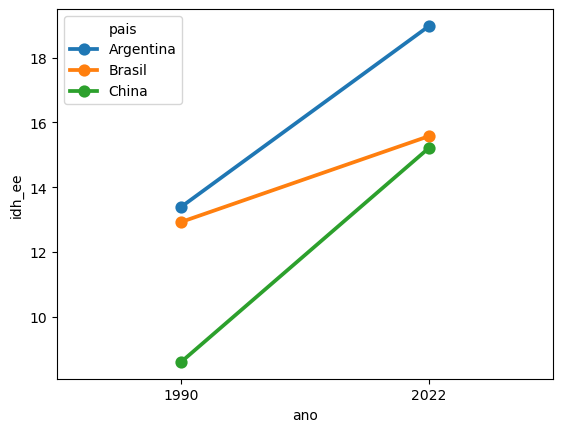

In [6]:
sns.pointplot(
    x="ano",
    y="idh_ee",
    hue="pais",
    data=df_comp_paises,
)


Poderíamos fazer vários ajustes no gráfico a partir do que já apreendemos, contudo, vamos prosseguir com nossas análises focando em usos das visualizações.

O pointplot é um gráfico extremamente versátil. Eles nos deixa criar visualizações como a que acabamos de criar, muito semelhante ao lineplot: Para isso podemos usar uma variável com informação temporal no Eixo X. 

Por outro lado, podemos fazer usos diferentes, por exemplo utilizando variáveis categóricas em um eixo e numérica no outro.

Vamos criar um dataframe apenas para 2022, e comparar a expectativa de educação entre países de diferentes níveis de IDH.

<Axes: xlabel='idh', ylabel='regiao'>

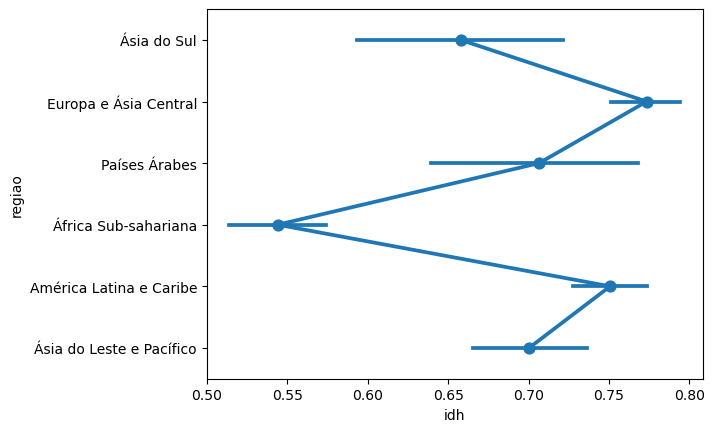

In [7]:
idh_2022 = idh.query("ano == 2022")

sns.pointplot(
    x="idh",
    y="regiao",
    data=idh_2022
)

O gráfico base pode parecer um tanto estranho, contudo com alguns ajustes podemos ter um gráfico bem interessante.

Devemos lembrar que cada ponto representa a média.

As linhas conectando os pontos podem nos ajudar a comparar com precisão a média entre os grupos, contudo não é estritamente necessária. Vamos removê-las usando o argumento `linestyle=""`.

<Axes: xlabel='idh', ylabel='regiao'>

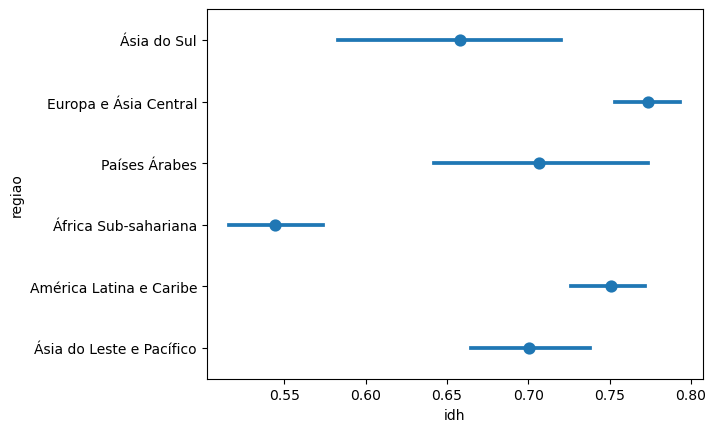

In [8]:
sns.pointplot(
    x="idh",
    y="regiao",
    linestyle="",
    data=idh_2022
)

Agora, podemos fazer uma última dupla de ajustes interessantes.

Primeiro, vamos adicionar um detalhe apenas estético marcando o fim de cada barra de erro. Para isso vamos adicionar o argumento `capsize=0.2`. O valor numérico desse argumento serve para controlarmos o tamanho desse traço que marca o limite da barra de erro.

Ainda, vamos aprender a fazer um tipo de ajuste específico na barra de erro. Podemos usá-la de forma a exibir algo semelhante ao que vimos com o boxplot. Para isso vamos criar uma lista no seguinte formato: `["pi", X]`, onde `X` é um número entre 0 e 100 e é o percentual dos dados centrais que queremos que a barra de erro cubra. Para um comportamento semelhante ao barplot, podemos usar `["pi", 50]`. Assim, a barra de erro cobrirá 50% dos dados centrais mas terá a média como centro, em vez da mediana (lembrando que por padrão o estimador usado é a média).

Estamos usando a função da barra de erro referente ao percentual. Para mais detalhes sobre a barra de erros, você pode [consultar a documentação relevante do seaborn](https://seaborn.pydata.org/tutorial/error_bars.html#percentile-interval-error-bars). Vamos tratar também desse assunto no curso de Ciência de Dados.


<Axes: xlabel='idh', ylabel='regiao'>

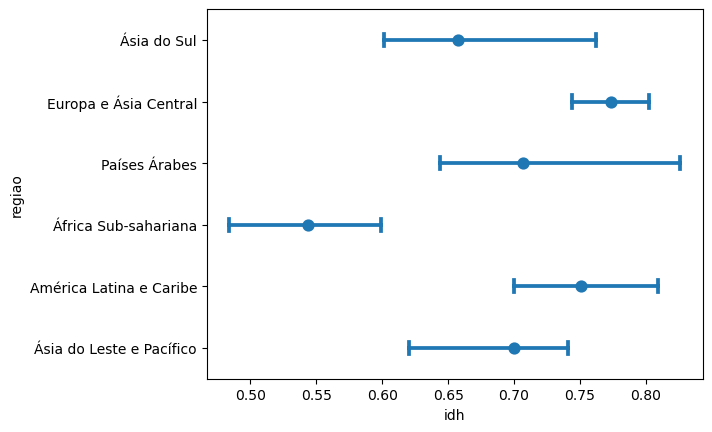

In [9]:
sns.pointplot(
    x="idh",
    y="regiao",
    linestyle="",
    capsize=0.2,
    errorbar=["pi", 50],
    data=idh_2022
)

Poderíamos alterar o estimador para a mediana adicionando o argumento `estimator="median"`, contudo vamos manter a média.

Vamos adicionar uma última alteração alterando o gráfico para que ele exiba TODA a faixa das observações. Para isso, vamos mudar a parte numérica da barra de erro de `50` para `100`.

<Axes: xlabel='idh', ylabel='regiao'>

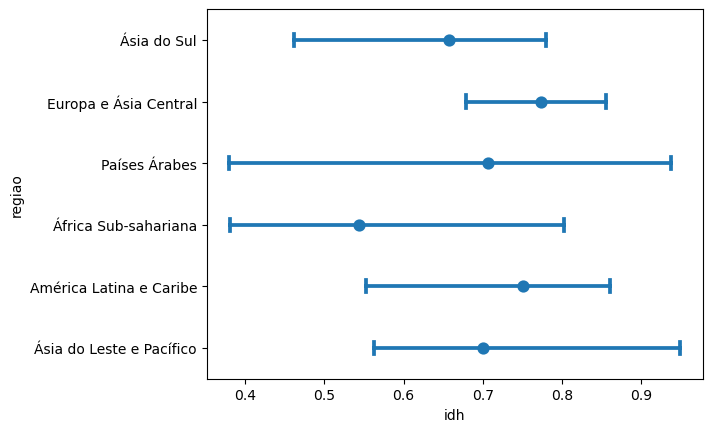

In [10]:
sns.pointplot(
    x="idh",
    y="regiao",
    linestyle="",
    capsize=0.2,
    errorbar=["pi", 100],
    data=idh_2022
)

Isso mostra a versatilidade da função `pointplot`. Para checar mais usos, você pode [consultar sua documentação](https://seaborn.pydata.org/generated/seaborn.pointplot.html).

Vimos agora outra forma de observar a distribuição de dados quando enfrentamos um problema que envolve uma variável categórica e uma numérica: primeiro com a função `boxplot` e agora com o `pointplot`. O `pointplot` traz menos minúcias que o gráfico de caixas, mas pode ser uma alternativa mais simples de visualização.

Nos dois casos poderíamos introduzir  outra variável categórica para fazer comparações mais intricadas, usando o argumento `hue`.

Uma limitação que observamos tanto no Boxplot quanto no Lineplot é que não recebemos nenhuma informação a respeito da quantidade de observações em cada grupo. Isso pode ser importante a medida que realizamos diferentes cortes. Não queremos fazer comparações entre grupos com milhares e dezenas de observações sem ter consciência disso.

Claro, poderíamos fazer um histograma, countplot, ou fazer isso apenas pelo código e gerar uma tabela. Outra ideia interessante, que seria tópico das últimas aulas do curso, seria adicionar um texto em cada caixa com uma informação do número de casos em cada grupo.

Contudo, em certos casos podemos usar um gráfico para isso ou até juntar dois gráficos para ter uma informação visual mais completa. Vamos explorar 2 gráficos com esse propósito: o `stripplot` e o `swarmplot`.

# `stripplot` e `swarmplot`: Visualizando cada observação

Tanto o `stripplot` quanto o `swarmplot` são gráficos que permitem observar a distribuição de uma variável numérica dentro de grupos diferentes. A ideia é que iremos criar um ponto para cada observação (uma linha, se nossos dados estiverem devidamente `tidy`): em um eixo a posição indica seu valor numérico e em outro ele fica agrupado pela variável categórica, assim como em gráficos de barra.

Vamos começar fazendo um `stripplot` com o IDH de 2022, agrupado por região.

<Axes: xlabel='idh', ylabel='regiao'>

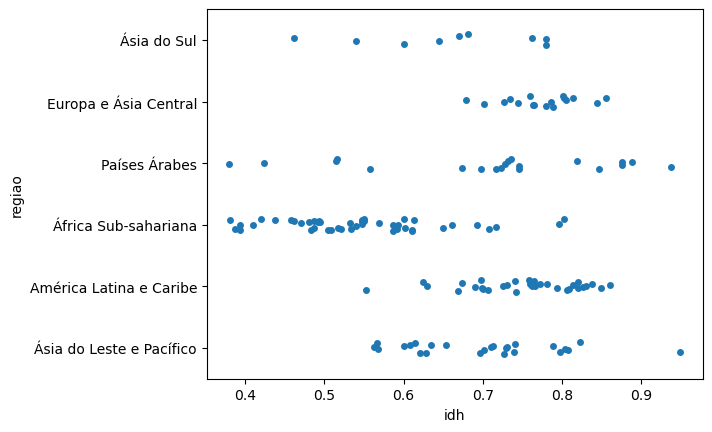

In [11]:
sns.stripplot(
    x="idh",
    y="regiao",
    data=idh_2022
)

O `swarmplot` tem o mesmo propósito do `stripplot`, e suas opções são quase inteiramente iguais. A diferença é que o `swarmplot` impede que os pontos se sobreponham. Isso pode ser útil em certas situações, mas se temos muitos pontos pode ser um problema tanto visualmente, quanto em termos de tempo de processamento (nosso gráfico pode demorar para ser gerado).

Veja abaixo o mesmo gráfico, apenas alterando a função de plotagem.

<Axes: xlabel='idh', ylabel='regiao'>

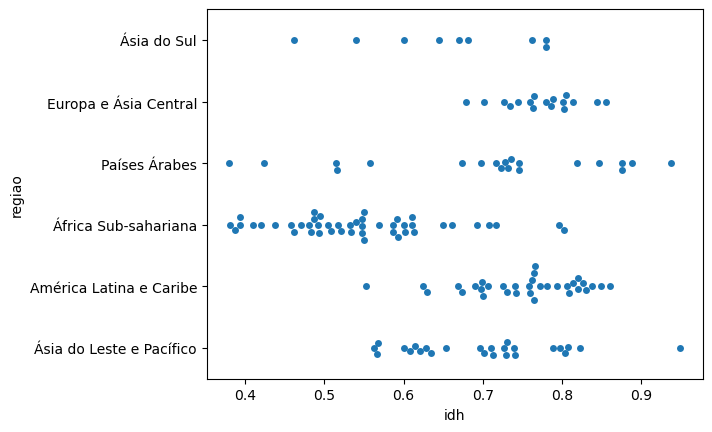

In [12]:
sns.swarmplot(
    x="idh",
    y="regiao",
    data=idh_2022
)


Uma informação importante de ter em mente é que a localização exata no eixo com a variável categória não é importante. Há sim uma diferença **qualitativa** entre os grupos diferentes, e devemos evitar que haja confusão entre os pontos ao fazer o gráfico.

Uma outra opção seria usar o `hue` para mapear outra variável categórica. Ou ainda, poderíamos usá-lo em substituição ao eixo categórico (Y nos gráficos acima). Vamos ver o resultado:

<Axes: xlabel='idh'>

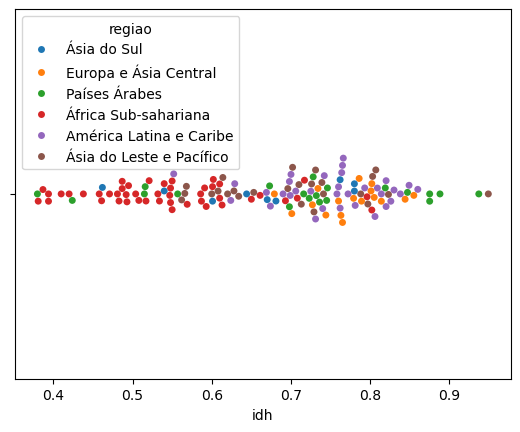

In [13]:
# mapeamos a região para cores em vez do eixo y
sns.swarmplot(
    x="idh",
    hue="regiao", 
    data=idh_2022,
)

Ou com o stripplot

<Axes: xlabel='idh'>

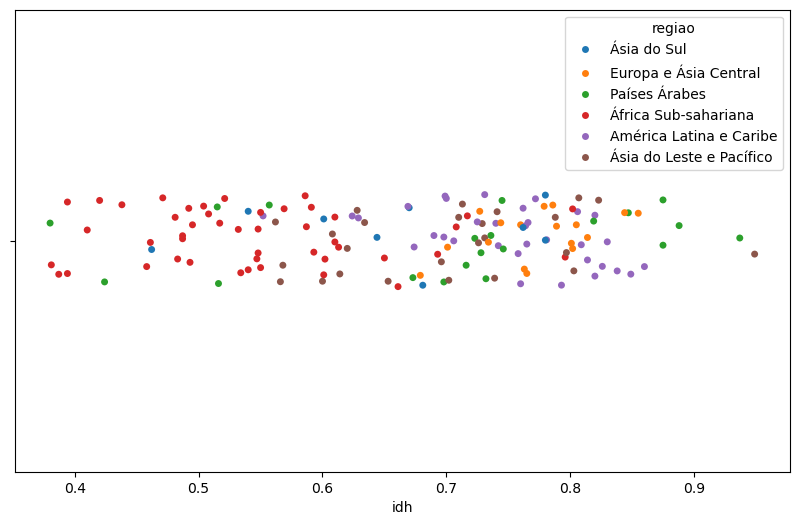

In [14]:
# vamos aumentar a imagem para ver a legenda melhor
fig, ax = plt.subplots(figsize=(10, 6))

# mapeamos a região para cores em vez do eixo y
sns.stripplot(
    x="idh",
    hue="regiao", 
    data=idh_2022,
)

### Desafio

Considerando que queremos comparar a distribuição de valores ENTRE as categorias (o que acima foi codificado visualmente com cores pelo `hue` e antes no eixo Y), qual dos dois modelos é mais apropriado?


Responda essa pergunta, pois ela é importante para usarmos adequadamente as visualizações.

# Gráfico Exploratório

Nessa aula não vamos fazer um gráfico necessariamente mais apresentável para um visualização concluída. Mencionamos acima que poderíamos combinar dois gráficos para ter uma visualização mais completa: facilitar a visualização da distribuição e ter uma ideia do número de observações.

Vamos fazer um gráfico assim.

Para isso, combinamos o `stripplot` com o `boxplot`. Você não precisa se preocupar inteiramente com como fazer com esse gráfico agora, mas perceba que o mecanismo principal é no mesmo eixo (`ax`) colocar os dois gráficos sobrepostos, como se desenhassemos uma figura sobre a outra.

Mas isso é apenas uma ideia de como usar as ferramentas do curso. Com exceção das 2 últimas linhas, todo o código abaixo já é em grande parte conhecido por nós.

Precisamos usar também alguns argumentos diferentes, `dodge` (este só é necessário em versões mais antigas do seaborn, como a presente no laboratório) e `alpha` (controla a transparências das cores) no stripplot.

Nas últimas versões (a partir da 0.13) esse código poderia ser ligeiramente mais simples nos dando mais controle, a partir de alguns argumentos diferentes. Mas é importante ver que muitas vezes podemos contornar as próprias limitações do pacote utilizando os recursos da função, por isso é importante consultar sua documentação quando queremos fazer algo diferente do padrão!



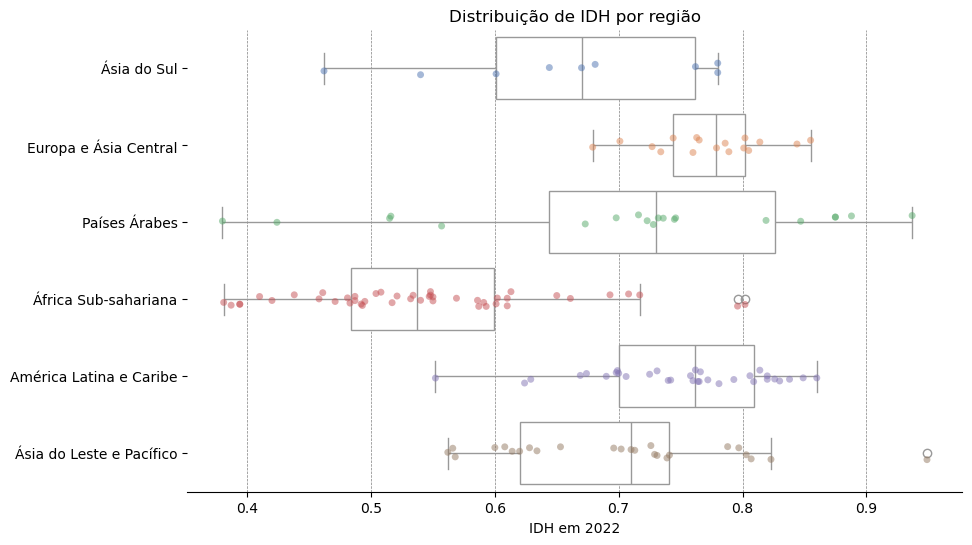

In [17]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.stripplot(
    x="idh",
    y="regiao",
    data=idh_2022,
    hue="regiao", 
    palette="deep",
    dodge=False,
    alpha=0.5,
    legend=False, # não cria legenda
    ax=ax,
)

sns.boxplot(
    x="idh",
    y="regiao",
    color="white",
    data=idh_2022,
    ax=ax,
)


ax.set_title("Distribuição de IDH por região")
ax.set_ylabel("")
ax.set_xlabel("IDH em 2022")
# Vamos adicionar linhas para facilitar a leitura dos valores
ax.grid(axis="x", which="major", linestyle="--", linewidth=0.5, color="gray")
# Remove as bordas do gráfico, exceto a inferior
sns.despine(ax=ax, left=True)

### Conclusão

Neste capítulo apresentamos como usar o `pointplot` de algumas formas. O pointplot é extremamente versátil, e permite que representemos a evolução de uma variável numérica no tempo, mostremos barras de erro ou variação de valores. Seu bom uso depende da compreensão apropriada do problema sendo abordado.

Ainda, vimos também como usar o `stripplot` e `swarmplot` para visualizar a distribuição de uma variável numérica em grupos diferentes com ênfase em exibir cada uma de nossas observações. Isso pode ser interessante se queremos passar uma ideia (no geral, não exata) do número de observações em cada grupo. 